# Project Summary
#### There are many Machine Learning (ML) and Natural Language Processing (NLP) tools to explore. Here I will define several products and analysis goals to achieve with NLP.
* 

In [1]:
%load_ext lab_black

In [2]:
%matplotlib inline

In [12]:
import numpy as np

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
import pandas as pd
import re
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import plotly
import plotly.express as px
import plotly.graph_objects as go
import json
from flask import Flask, jsonify, render_template

import nltk

# from nltk.corpus import stopwords
from datetime import date

In [4]:
import pywhatkit

In [6]:
pywhatkit.text_to_handwriting("""Test this library""")

In [5]:
# from fpdf import FPDF

## Begin with FOTR

In [7]:
# Get the data
# Decision: read from a PDF or .txt file? The PDF may require extra data wrangling and cleanup, which is good, but the .txt can be had from Kaggle. Perhaps better practice from PDF.
# Could use both at first to compare...

In [8]:
PATH = os.path.join("data", "01 - The Fellowship Of The Ring.txt")

In [9]:
with open(
    PATH, "r", encoding="ISO-8859-1"
) as file:  # changed encoding to deal with "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 2836: invalid continuation byte" error
    lotr_text = file.read()

## Experiment with TensorFlow and Keras
#### Think about the end goal and then plot next steps... this might not be the path to go on since this is specific to the Character RNN exercise in the HOML text.

In [10]:
# tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)

NameError: name 'keras' is not defined

In [ ]:
tokenizer.fit_on_texts([lotr_text])

In [ ]:
max_id = len(tokenizer.word_index)

In [ ]:
max_id

In [ ]:
dataset_size = tokenizer.document_count

In [ ]:
dataset_size

In [ ]:
[encoded] = np.array(tokenizer.texts_to_sequences([lotr_text])) - 1

### From news-sentiment-analysis-app

In [13]:
nltk.download("stopwords")
stoplist = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidvance/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Get nGrams: (2, 2) for bigrams, (3, 3) for trigrams...
vectorizer = CountVectorizer(
    stop_words=stoplist, ngram_range=(3, 3)
)  # Converts a collection of text documents to a matrix of token counts: the occurrences of tokens in each document. This implementation produces a sparse representation of the counts.
X = vectorizer.fit_transform([lotr_text])
features = vectorizer.get_feature_names()
print("\n\nX : \n", X.toarray())



X : 
 [[1 1 1 ... 1 1 1]]


In [15]:
# Getting top ranking features
sums = X.sum(axis=0)
data = []
for col, term in enumerate(features):
    data.append((term, sums[0, col]))
ranking = pd.DataFrame(data, columns=["phrase", "rank"])
words = ranking.sort_values("rank", ascending=False)
print("\n\nWords : \n", words.head(20))



Words : 
                      phrase  rank
42444             let us go    10
63241     said mr butterbur     8
63966        sam said frodo     8
3134   aragorn son arathorn     8
50147         mr frodo said     7
28184    frodo said gandalf     6
30988         go said frodo     6
52609    nothing could seen     6
27662       frodo could see     6
69144          sir said sam     6
30179       gimli son glóin     6
60257      right said frodo     6
42446           let us hope     6
62718    said frodo looking     6
53308      old tom bombadil     5
63150        said low voice     5
60577         ring rule one     5
47539       mean said frodo     5
39661       know said frodo     5
13965     could see nothing     5


In [16]:
# Select top 50 nGrams and add to new dataframe
trigram_df = words.head(n=50)

In [36]:
df_data = trigram_df
term = df_data["phrase"]
frequency = df_data["rank"]

trace1 = {
    "x": term,
    "y": frequency,
    "mode": "markers",
    "hovertemplate": "Trigram: %{x}<br>Count: %{y}<extra></extra>",
    "marker": {
        "color": frequency,
        "size": frequency,
        "sizeref": 0.3,
        "sizemode": "area",
        "opacity": 1,
    },
}

data_to_plot = [
    trace1,
]

plot_layout = {
    "title": "Trigram frequency",
    "autosize": False,
    "height": 700,
    "width": 1200,
    "margin": {"l": 50, "r": 50, "b": 200, "t": 100, "pad": 4},
    "xaxis": {
        "title": "Trigrams",
        "automargin": True,
        "tickangle": 45,
        "titlefont": {"family": "Arial, bold", "size": 18, "color": "black"},
    },
    "yaxis": {
        "title": "Count",
        "automargin": True,
        "type": "log",
        "titlefont": {"family": "Arial, sans-serif", "size": 18, "color": "black"},
    },
}

In [40]:
fig = go.Figure(data_to_plot, plot_layout)

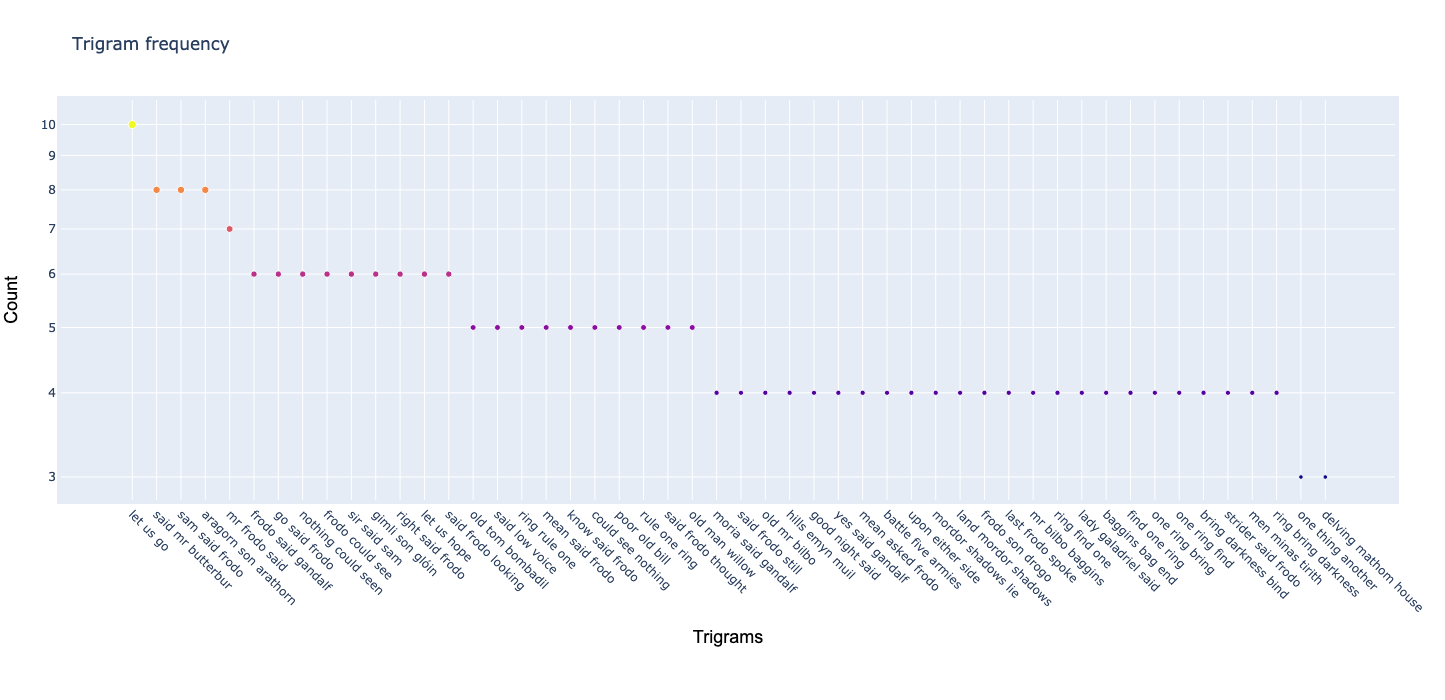

In [41]:
fig.update_yaxes(type="log")

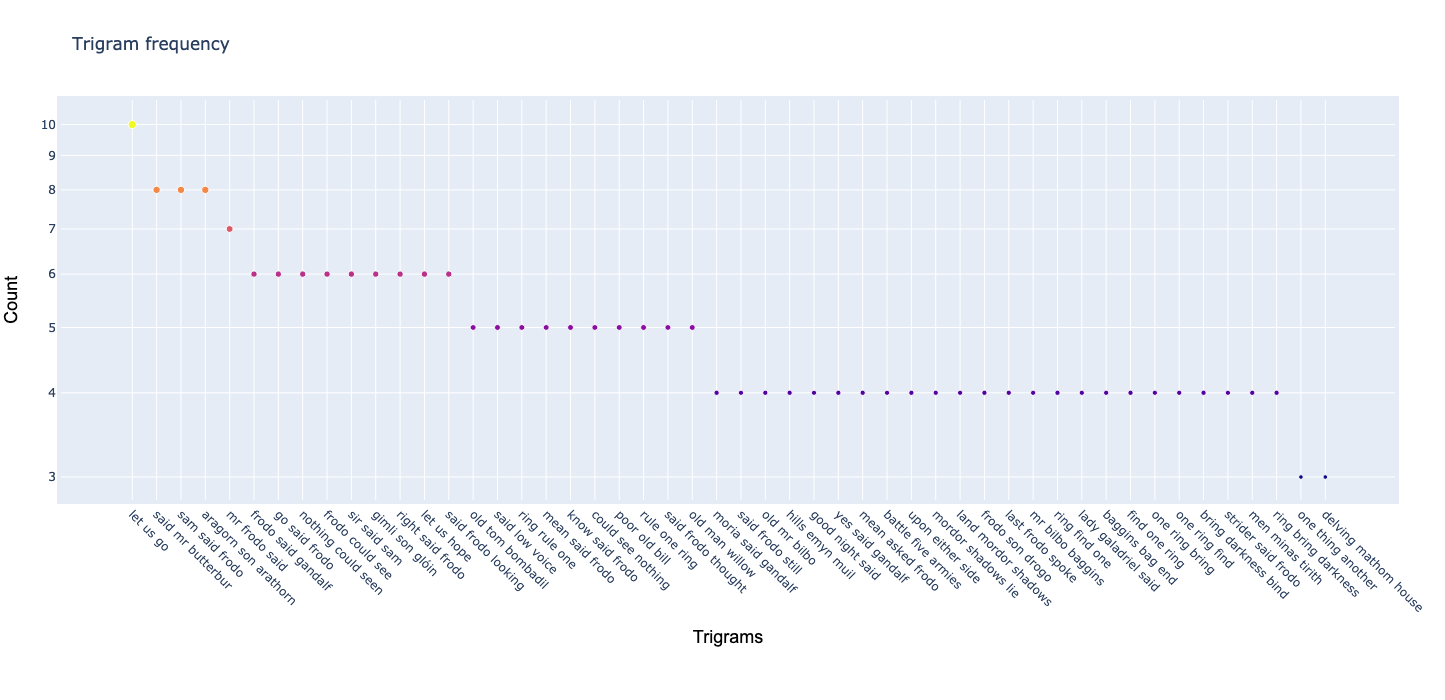

In [42]:
fig.show()